In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [24]:
train_dataset = pd.read_csv('train.csv')
valid_dataset = pd.read_csv('valid.csv')
test_dataset = pd.read_csv('test.csv')

# Label 01

In [25]:
label_1_train_ori = train_dataset.drop(columns=['label_2','label_3','label_4'])
label_1_valid_ori = valid_dataset.drop(columns=['label_2','label_3','label_4'])

## Handle Missing Values

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(label_1_train_ori.isnull().sum())

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57     0
feature_58     0
feature_59    

No missing values in label_1

## Check for category distribution

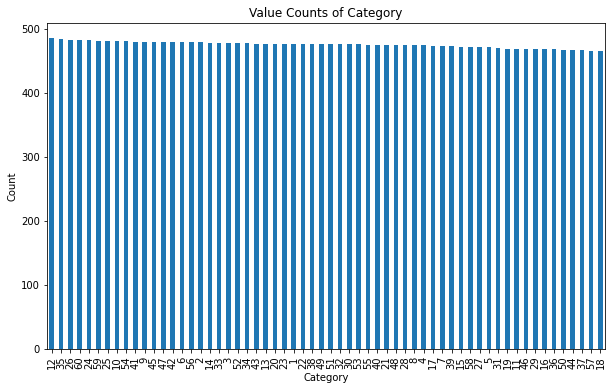

In [27]:
value_counts = label_1_train_ori['label_1'].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

No need to handle class imbalances

## Without any tuning

In [28]:
X_train_ini_label_1 = label_1_train_ori.drop(columns=['label_1'])
y_train_ini_label_1 = label_1_train_ori['label_1']
X_valid_ori_label_1 = label_1_valid_ori.drop(columns=['label_1'])
y_valid_ori_label_1 = label_1_valid_ori['label_1']

scaler = StandardScaler()
scaled_data_label_1 = scaler.fit_transform(X_train_ini_label_1)
scaled_valid_data_label_1 = scaler.transform(X_valid_ori_label_1)

In [29]:
clf = SVC(kernel='linear')
clf.fit(X_train_ini_label_1,y_train_ini_label_1)
predictions_label_1 = clf.predict(X_valid_ori_label_1)
initial_accuracy = accuracy_score(y_valid_ori_label_1, predictions_label_1)
print(f"Accuracy: {initial_accuracy*100:.2f}%")

Accuracy: 97.33%


In [30]:
label_1_data_to_predict = test_dataset.drop(columns=['ID'])
test_scaled_label_1 = scaler.transform(label_1_data_to_predict)
test_principal_df = pd.DataFrame(data = test_scaled_label_1,columns=[f'new_feature_{i}' for i in range(test_scaled_label_1.shape[1])])

final_label_1_predict = clf.predict(test_principal_df)

c:\Users\Wenuka\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- new_feature_0
- new_feature_1
- new_feature_10
- new_feature_100
- new_feature_101
- ...
Feature names seen at fit time, yet now missing:
- feature_1
- feature_10
- feature_100
- feature_101
- feature_102
- ...

  warnings.warn(message, FutureWarning)


In [31]:
final_submission = "190601D_submission1.csv"
data = {
 'ID' : test_dataset['ID'],
 'label_1' : final_label_1_predict
}
df = pd.DataFrame(data)
df.to_csv(final_submission,index=False)

## PCA Analysis

In [ ]:
pca = PCA(n_components=0.97,svd_solver='full')
principal_components_label_1 = pca.fit_transform(scaled_data_label_1)
valid_principal_components_label_1 = pca.transform(scaled_valid_data_label_1)

principal_df_label_1 = pd.DataFrame(data=principal_components_label_1, columns=[f'new_feature_{i}' for i in range(principal_components_label_1.shape[1])])
valid_principal_df_label_1 = pd.DataFrame(data = valid_principal_components_label_1,columns=[f'new_feature_{i}' for i in range(valid_principal_components_label_1.shape[1])])

In [ ]:
clf = SVC(kernel='linear')
clf.fit(principal_df_label_1,y_train_ini_label_1)
predictions_label_1 = clf.predict(valid_principal_df_label_1)
_accuracy = accuracy_score(y_valid_ori_label_1, predictions_label_1)
print(f"Accuracy: {_accuracy*100:.2f}%")

## Hyperparameter Tuning

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {
                'C': [1, 10, 20, 30, 40, 50, 100],
                'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                'gamma': ['scale', 'auto']
                }

base_estimator = SVC(gamma='scale', kernel='rbf', random_state=42)
search = HalvingGridSearchCV(base_estimator, param_grid, cv=5, verbose=1, n_jobs=7)
search.fit(principal_df_label_1, y_train_ini_label_1)

print(search.best_params_)
print(search.best_score_)

In [ ]:
y_pred_label_1 = search.best_estimator_.predict(valid_principal_df_label_1)
accuracy_tuned = accuracy_score(y_pred_label_1, y_valid_ori_label_1)
print(f"Accuracy on validation data: {accuracy_tuned * 100:.2f}%")